In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2022-05-26 22:35:41.026896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 22:35:41.026923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


2022-05-26 22:35:54.569374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 22:35:54.569768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 22:35:54.569867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-26 22:35:54.569961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-26 22:35:54.570052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

363/363 [==============================] - 1s 1ms/step - loss: 22974149433491456.0000 - val_loss: 14617883443200.0000
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 7723970199552.0000 - val_loss: 3417093963776.0000
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1805568049152.0000 - val_loss: 798785339392.0000
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 422071828480.0000 - val_loss: 186725318656.0000
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 98664218624.0000 - val_loss: 43649114112.0000
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 23063846912.0000 - val_loss: 10203475968.0000
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 5391437312.0000 - val_loss: 2385182720.0000
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 1260309632.0000 - val_loss: 557565056.0000
Epoch 9/20
363/363 [==================

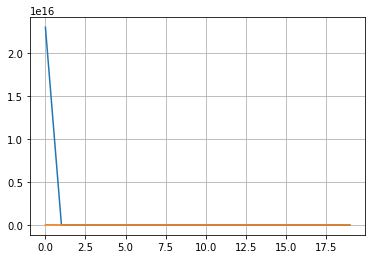

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history2 = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test2 = model.evaluate(X_test_scaled, y_test)
X_new2 = X_test_scaled[:3]
y_pred2 = model.predict(X_new2)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8737 - val_loss: 0.7688
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6360 - val_loss: 0.6091
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5649 - val_loss: 0.5705
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5354 - val_loss: 0.5174
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5143 - val_loss: 0.4895
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4965 - val_loss: 0.4710
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4821 - val_loss: 0.4634
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4702 - val_loss: 0.4442
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4602 - val_loss: 0.4338
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4519 - val_loss: 0.4252

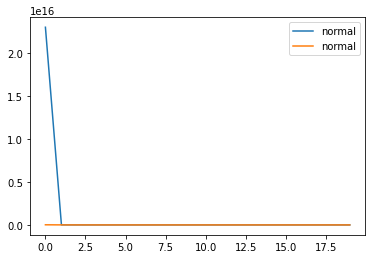

In [13]:
plt.plot(pd.DataFrame(history.history), label='normal')
plt.legend()
plt.show()

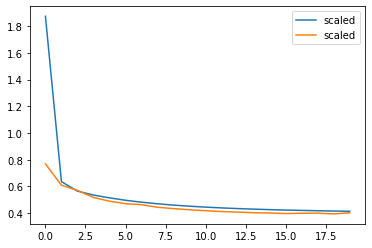

In [14]:
plt.plot(pd.DataFrame(history2.history), label='scaled')
plt.legend()
plt.show()

# Dane zawsze muszą być przeskalowane